In [21]:
from utils import load_data_from_csv, c_index
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Load dataset

In [2]:
X_train_org, X_test, y_train_org, y_test = load_data_from_csv(threshold=10, test_size=0.2)

In [3]:
print("X_train shape:", X_train_org.shape)
print("X_test shape:", X_test.shape)

X_train shape: (6863, 18)
X_test shape: (1716, 18)


Split to X_train / X_val (75% - 25% of X_train data)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_org, y_train_org, test_size=0.25, random_state=42)

In [5]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (5147, 18)
X_val shape: (1716, 18)
X_test shape: (1716, 18)


Show information of X_train

In [6]:
X_train.head()

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
8559,67.0,88.0,351.0,1.0,48.5,7.0,4.1,227.0,152.0,1.52,6.6,1.0,156.0,326.0,46.6,9.8,31.267452,68.0
7348,34.0,100.0,999.0,2.0,44.4,19.0,3.7,297.0,143.0,1.86,6.8,1.0,150.0,399.0,35.8,5.6,25.113065,50.0
5056,39.0,94.0,999.0,1.0,49.7,11.0,4.3,213.0,62.0,1.68,7.4,1.0,158.0,343.0,18.1,8.6,26.533553,64.0
3655,39.0,85.0,59.0,1.0,49.2,23.0,4.5,235.0,61.0,1.67,7.4,2.0,130.0,319.0,19.1,9.8,32.807368,45.0
2048,33.0,82.0,168.0,2.0,77.7,31.0,4.7,275.0,75.0,1.90,7.9,1.0,126.0,320.0,23.4,9.4,30.366643,44.0


Get random sample of X_train 

In [7]:
random_index = random.randint(0, len(X_train))
print(X_train.iloc[random_index, :])
print(y_train[random_index])

Age                    41.000000
Diastolic BP           66.000000
Poverty index         233.000000
Race                    1.000000
Red blood cells        44.700000
Sedimentation rate     10.000000
Serum Albumin           4.500000
Serum Cholesterol     172.000000
Serum Iron            114.000000
Serum Magnesium         1.850000
Serum Protein           6.800000
Sex                     2.000000
Systolic BP           106.000000
TIBC                  398.000000
TS                     28.600000
White blood cells       6.700000
BMI                    23.942641
Pulse pressure         40.000000
Name: 8775, dtype: float64
True


# Check Data

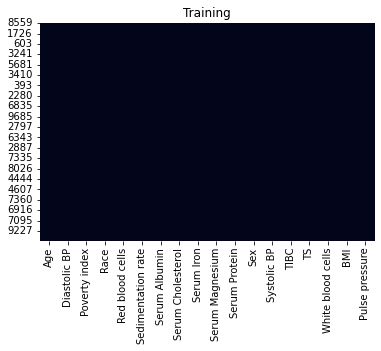

In [8]:
sns.heatmap(X_train.isnull(), cbar=False)
plt.title("Training")
plt.show()

# Decision Trees

Without max_depth and min_samples_split

In [22]:
dt_with_out_max_depth = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_with_out_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_train_preds = dt_with_out_max_depth.predict_proba(X_train)[:, 1]
y_val_preds = dt_with_out_max_depth.predict_proba(X_val)[:, 1]

In [24]:
print("Train accuracy: ", c_index(y_train.values, y_train_preds))
print("Val accuracy: ", c_index(y_val.values, y_val_preds))

Train accuracy:  1.0
Val accuracy:  0.5858987700932962


### Change hyper parameters to get better result

In [27]:
decision_tree_hyperparams = {
    'max_depth': 5,
}

In [28]:
decision_tree_with_max_depth = DecisionTreeClassifier(**decision_tree_hyperparams, random_state=42)
decision_tree_with_max_depth.fit(X_train, y_train)

# validation
y_train_preds = decision_tree_with_max_depth.predict_proba(X_train)[:, 1]
y_val_preds = decision_tree_with_max_depth.predict_proba(X_val)[:, 1]

# print
print("Train accuracy: ", c_index(y_train.values, y_train_preds))
print("Val accuracy: ", c_index(y_val.values, y_val_preds))

Train accuracy:  0.78137505804202
Val accuracy:  0.7186187061499889


[Text(167.4, 199.32, 'X[0] <= 64.5\ngini = 0.31\nsamples = 5147\nvalue = [4159, 988]'),
 Text(83.7, 163.07999999999998, 'X[2] <= 140.5\ngini = 0.2\nsamples = 3621\nvalue = [3213, 408]'),
 Text(41.85, 126.83999999999999, 'X[11] <= 1.5\ngini = 0.307\nsamples = 754\nvalue = [611, 143]'),
 Text(20.925, 90.6, 'X[0] <= 49.5\ngini = 0.409\nsamples = 209\nvalue = [149, 60]'),
 Text(10.4625, 54.359999999999985, 'X[17] <= 31.0\ngini = 0.314\nsamples = 128\nvalue = [103, 25]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.256\nsamples = 113\nvalue = [96, 17]'),
 Text(31.387500000000003, 54.359999999999985, 'X[2] <= 124.5\ngini = 0.491\nsamples = 81\nvalue = [46, 35]'),
 Text(26.15625, 18.119999999999976, 'gini = 0.457\nsamples = 68\nvalue = [44, 24]'),
 Text(36.61875, 18.119999999999976, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(62.775000000000006, 90.6, 'X[1] <= 99.0\ngini = 0.258\nsamples = 5

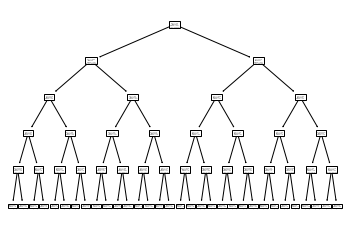

In [30]:
# plot tree

tree.plot_tree(decision_tree_with_max_depth)